In [8]:
import os
import struct
import numpy as np
from mlp import MLP
import matplotlib.pyplot as plt 

In [3]:
%matplotlib inline

In [4]:
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2

    return images, labels

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/iris.data.txt')
X = df.iloc[:, :-1].as_matrix()
y = df.iloc[:, -1].as_matrix()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2)

/usr/lib/yandex/taxi-dmp-jupyter/kernel/run:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Чтобы при импорте business_models в Jupyter ноутбуке
/usr/lib/yandex/taxi-dmp-jupyter/kernel/run:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # не выводился warning. Сам по себе business_models


In [16]:
X_train, y_train = load_mnist('./data/', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [17]:
X_test, y_test = load_mnist('./data/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


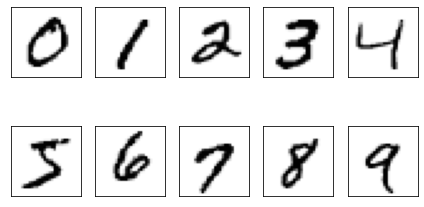

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

In [20]:
n_epochs = 50

nn = MLP(n_features=X_train.shape[1],
         n_labels=10,
         hidden=[30, 10], 
         l2=0.01, 
         epochs=n_epochs, 
         eta=0.0005,
         minibatch_size=100, 
         shuffle=True,
         seed=1)

nn.fit(X_train=X_train[:55000], 
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])

50/50 | Cost: 17273.31 | Train/Valid Acc.: 95.64%/95.94%  

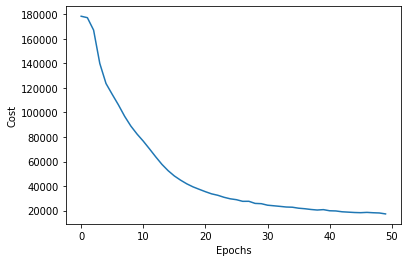

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.show()

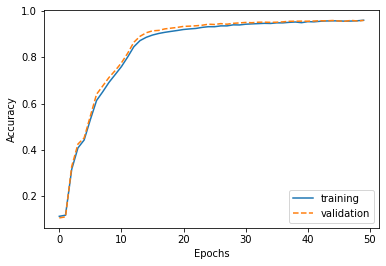

In [23]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], 
         label='training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], 
         label='validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
#plt.savefig('images/12_08.png', dpi=300)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(nn.predict(X_test), y_test)

0.948